In [1]:
from SeversonDataset_preprocess import mat_to_npy 

mat_to_npy() # load mat files and delete some samples with anomalies

skip err cell: batch 1, cell_id 0
skip err cell: batch 1, cell_id 1
skip err cell: batch 1, cell_id 2
skip err cell: batch 1, cell_id 3
skip err cell: batch 1, cell_id 4
skip err cell: batch 1, cell_id 5
(4, 256)
(4, 256)
(1, 4, 512)
(4, 256)
(4, 256)
(1, 4, 512)
(4, 256)
(4, 256)
(1, 4, 512)
(4, 256)
(4, 256)
(1, 4, 512)
(4, 256)
(4, 256)
(1, 4, 512)
(4, 256)
(4, 256)
(1, 4, 512)
(4, 256)
(4, 256)
(1, 4, 512)
(4, 256)
(4, 256)
(1, 4, 512)
(1, 4, 512)
(1, 4, 512)
(1, 4, 512)
(1, 4, 512)
(1, 4, 512)
(1, 4, 512)
(1, 4, 512)
(1, 4, 512)
b1c06 finished
(4, 256)
(4, 256)
(1, 4, 512)
(4, 256)
(4, 256)
(1, 4, 512)
(4, 256)
(4, 256)
(1, 4, 512)
(4, 256)
(4, 256)
(1, 4, 512)
(4, 256)
(4, 256)
(1, 4, 512)
(4, 256)
(4, 256)
(1, 4, 512)
(4, 256)
(4, 256)
(1, 4, 512)
(4, 256)
(4, 256)
(1, 4, 512)
(1, 4, 512)
(1, 4, 512)
(1, 4, 512)
(1, 4, 512)
(1, 4, 512)
(1, 4, 512)
(1, 4, 512)
(1, 4, 512)
b1c07 finished
skip err cell: batch 1, cell_id 8
(4, 256)
(4, 256)
(1, 4, 512)
(4, 256)
(4, 256)
(1, 4, 512)


n cells: 114
min EOL: 326, max EOL: 1934


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

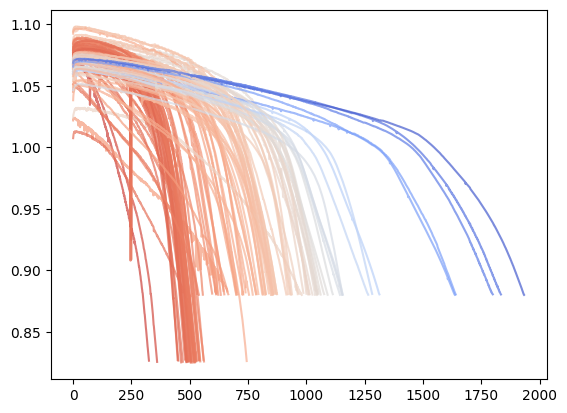

In [2]:
%matplotlib inline
from SeversonDataset_preprocess import data_visualization

data_visualization(f_id =1) # capacity fade curve for all cells

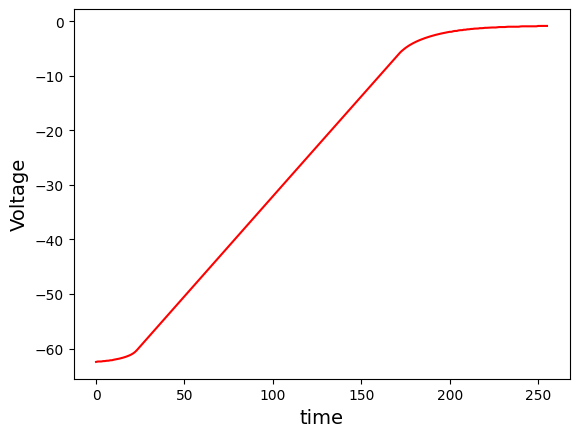

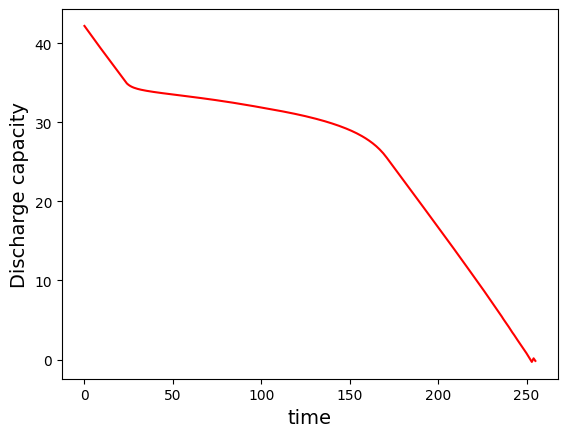

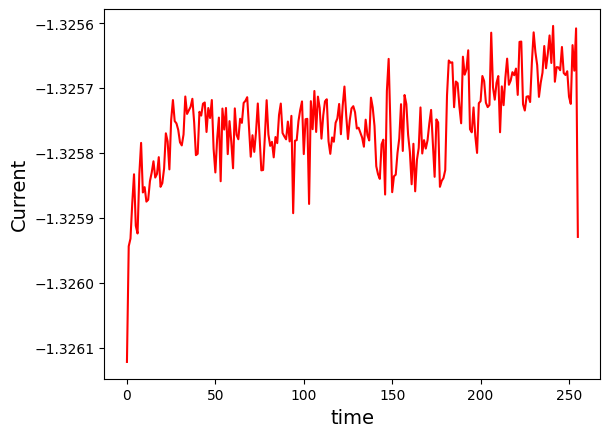

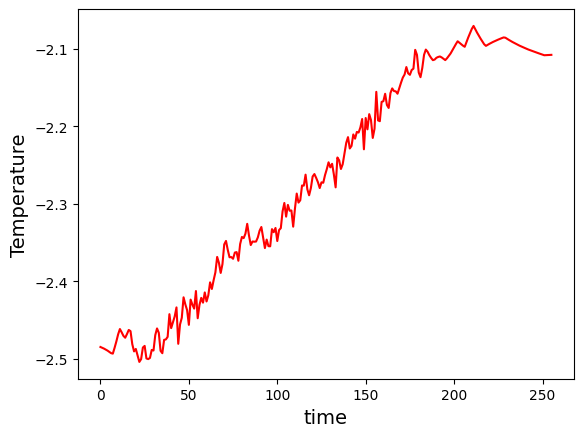

In [3]:
%matplotlib inline
from SeversonDataset_preprocess import train_val_split
from data_preprocessing import Feature_Selector_Dataset

# training:testing = 8:2
train_val_split(seed=41) 

# load dataset for pytorch
feature_selector_set = Feature_Selector_Dataset(train=True, pred_target='quality', part='discharge', norm=False)
feature_selector_set.visualize(120, 0)
feature_selector_set.visualize(120, 1)
feature_selector_set.visualize(120, 2)
feature_selector_set.visualize(120, 3)

In [4]:
from data_preprocessing import load_Severson
trn_feature, trn_target = load_Severson(training=True, norm=False, part='discharge')

In [5]:
print(trn_feature.shape)
print(trn_target.shape)

(728, 4, 256)
(728, 3)


In [6]:

# Reshape the training data from (4550, 4, 500) to (91, 100000)
# 4550 = 91 batteries * 50 cycles, reshaping cycles and features
num_batteries = 91
num_features = trn_feature.shape[1]
data_per_cycle = trn_feature.shape[2]
training_data_reshaped = trn_feature.reshape(num_batteries, -1)  # (91, 100000)
cycle = 8
# Extract the last target ([:,2]) and reshape into (91, 1)
# Ensure only one target per battery by taking the first target for each set of 50 cycles
training_target_reshaped = trn_target[::cycle, 2].reshape(num_batteries, -1)  # (91, 1)

In [7]:
print(training_data_reshaped.shape)
print(training_target_reshaped.shape)

(91, 8192)
(91, 1)
